# Project 2 Submission, Rev 1
## Data used: Titanic Data
## Project questions
* What factors contributed to the survival of the passengers?
* Were the lower class passengers unfairly treated, which led to more fatality?
* Were young childeren and women more likely to have survived the accident?

## 1. Data Wrangling
* To clean the data set, float(), int(), and str() were used in functions to assign appropriate data types to respective columns.
* Two additional columns have been added to indicate whether the passenger had sibling/spouse or parent/child for use in later data investigation.
* In depth analysis was performed for missing "Age" data.

In [133]:
####################################
#     Project Titanic
####################################

import unicodecsv
import pandas as pd
import numpy as np

##################################
### Data Wrangling 
##################################

def convert_to_float(j): #Convert to float
    if j == '':
        return None
    else:
        return float(j)
    
def convert_to_int(j): #Convert to int
    if j == '':
        return None
    else:
        return int(j)
    
def convert_to_str(j): #Convert to str
    if j == '':
        return None
    else:
        return str(j)

filename = 'titanic-data.csv'
titanic_data_df = pd.read_csv(filename)

titanic_data_df['PID'] = titanic_data_df['PassengerId']  #Change PassengerID name to PID
del titanic_data_df['PassengerId']

titanic_data_df['Survived'].apply(convert_to_int)
titanic_data_df['Pclass'].apply(convert_to_int)
titanic_data_df['SibSp'].apply(convert_to_int)
titanic_data_df['Parch'].apply(convert_to_int)
titanic_data_df['PID'].apply(convert_to_int)

titanic_data_df['Age'].apply(convert_to_float)
titanic_data_df['Fare'].apply(convert_to_float)

titanic_data_df['Name'].apply(convert_to_str)
titanic_data_df['Sex'].apply(convert_to_str)
titanic_data_df['Ticket'].apply(convert_to_str)
titanic_data_df['Cabin'].apply(convert_to_str)
titanic_data_df['Embarked'].apply(convert_to_str)

# Add columns to indicate whether siblings or parent/child were onboard
titanic_data_df['Has_SibSp'] = (titanic_data_df['SibSp'] >= 1)
titanic_data_df['Has_Parch'] = (titanic_data_df['Parch'] >= 1)

titanic_data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PID,Has_SibSp,Has_Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,True,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,True,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,True,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,False,False


In [134]:
###
### Check data for Null values
###

def get_null(var):
    '''
    Function returns DataFrame only consisting rows with Null values
    '''
    is_null = pd.isnull(titanic_data_df[var])
    index = is_null[is_null == True].index.tolist()
    df_null = titanic_data_df.iloc[index]
    
    return df_null

print 'Table: Categories with missing values: True = missing, False = no missing data'
print pd.isnull(titanic_data_df).any()  # Prints all columns that contain Null values

Table: Categories with missing values: True = missing, False = no missing data
Survived     False
Pclass       False
Name         False
Sex          False
Age           True
SibSp        False
Parch        False
Ticket       False
Fare         False
Cabin         True
Embarked      True
PID          False
Has_SibSp    False
Has_Parch    False
dtype: bool


* Any column with NaN or Null value has been identified as summarized in the table above. "Age", "Cabin", and "Embarked" categories have missing data.
* In depth analysis is provided below regarding missing data in "Age" category. Such analysis is important as it may affect any analysis involving "Age" category.

In [135]:
# Missing data in "Age" category

df_null = get_null('Age')
num_missing_Age = len(df_null)

print ('Category "Age" has {} missing data, which is {:0.3f} of all passengers.'.format(num_missing_Age, 
                                                float(num_missing_Age)/len(titanic_data_df['PID'])) + '\n')
df_null.head()

Category "Age" has 177 missing data, which is 0.199 of all passengers.



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PID,Has_SibSp,Has_Parch
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,6,False,False
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,18,False,False
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,20,False,False
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,27,False,False
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29,False,False


In [136]:
# Missing "Age" data in passengers who survived and died

tab_null = df_null.groupby('Survived').count()['PID']
tab_null.index = ['Died', 'Survived']
num_passenger_by_Survived = titanic_data_df.groupby('Survived').count()['PID']
num_passenger_by_Survived.index = ['Died', 'Survived']

print ('Number of missing "Age" data for passengers who survived and died:' + '\n')
print tab_null
print'\n'
print 'Table: Percent of passengers with missing "Age" data for passengers who survived and died'
print tab_null / num_passenger_by_Survived

Number of missing "Age" data for passengers who survived and died:

Died        125
Survived     52
Name: PID, dtype: int64


Table: Percent of passengers with missing "Age" data for passengers who survived and died
Died        0.227687
Survived    0.152047
Name: PID, dtype: float64


* The table above shows the percent of "Age" data missing for passengers who survived and died from the accident.
* Since the percentage of "Age" data missing from those who died (22.3%) is higher than those survived (15.2%) the accident, there is a possibility that some portions of the record may have been collected after the accident.

In [137]:
# Analyze how missing "Age" data is distributed in "Sex" category

tab_null1 = pd.crosstab(index=df_null['Sex'], columns=df_null['Survived'])
tab_null1.columns = ['Died', 'Survived']
num_passenger_by_Sex = pd.crosstab(index=titanic_data_df['Sex'], columns=titanic_data_df['Survived'])
num_passenger_by_Sex.columns = ['Died', 'Survived']

print ('Number of missing "Age" data in "Sex" category:' + '\n')
print df_null.groupby('Sex').count()['PID']
print '\n'
print tab_null1
print'\n'
print 'Table: Percent of passengers with missing "Age" data by gender'
tab_null1 / num_passenger_by_Sex

Number of missing "Age" data in "Sex" category:

Sex
female     53
male      124
Name: PID, dtype: int64


        Died  Survived
Sex                   
female    17        36
male     108        16


Table: Percent of passengers with missing "Age" data by gender


,Died,Survived
Sex,,
female,0.209877,0.154506
male,0.230769,0.146789


* "Age" data missing by gender also shows that higher percentage of data is missing for passengers who died than survived the accident within each gender.

In [138]:
# Analyze how missing "Age" data is distributed in "Pclass" category

tab_null2 = pd.crosstab(index=df_null['Pclass'], columns=df_null['Survived'])
tab_null2.columns = ['Died', 'Survived']
num_passenger_by_Pclass = pd.crosstab(index=titanic_data_df['Pclass'], columns=titanic_data_df['Survived'])
num_passenger_by_Pclass.columns = ['Died', 'Survived']

print ('Number of missing "Age" data in "Pclass" category:' + '\n')
print df_null.groupby('Pclass').count()['PID']
print '\n'
print tab_null2
print '\n'
print 'Table: Percent of passengers with missing "Age" data by Passenger Class'
tab_null2 / num_passenger_by_Pclass

Number of missing "Age" data in "Pclass" category:

Pclass
1     30
2     11
3    136
Name: PID, dtype: int64


        Died  Survived
Pclass                
1         16        14
2          7         4
3        102        34


Table: Percent of passengers with missing "Age" data by Passenger Class


,Died,Survived
Pclass,,
1,0.200000,0.102941
2,0.072165,0.045977
3,0.274194,0.285714


* The missing "Age" data by passenger class show an interesting outcome.
* Missing "Age" data in second class passengers for both who died (7.2%) and survived (5.0%) are much lower compared with overall missing data percentage of 19.9%.
* Missing "Age" data in third class passengers are similarly high for both who died (27.4%) and survived (28.6%) the accident. This observation differs from the fact that the percentage missing "Age" data were higher for passengers who died. This leads to speculation whether less effort has been made to acquire information for third class passengers than first or second class passengers.

## 2. Data Exploration
* Three functions have been defined to facilitate calculation of survival rates for various variables.
* Survival rates based on gender, age, passenger class, presence of sibling/spouse or parent/child, and port embarked were analyzed in this section.
* Out of 891 passengers, age data for 177 passengers were misssing. Those passengers with missing age information were omitted from any calculation or graphs that require passenger age; however, they were included in all other calculations or graphs that do not specifically need age information.

In [139]:
################################
### Data Exploration
################################

def cal_passengers(variable, key):
    '''
    Calculates number of passengers for given variable and key
    '''
    return (titanic_data_df[variable] == key).sum()

def cal_survivers(variable, key):
    '''
    Calculates number of survivals for given variable and key
    '''
    grouped_data = titanic_data_df.groupby(variable)
    return grouped_data['Survived'].sum()[key]

def cal_survival_rate(variable, key):
    '''
    Calculates survival rates for given variable and key
    '''
    num_of_passengers = cal_passengers(variable, key)
    survived_passengers = cal_survivers(variable, key)
    return float(survived_passengers) / num_of_passengers

# Number of passengers
num_passenger = len(titanic_data_df['PID'])
male_passenger = cal_passengers('Sex', 'male')
female_passenger = cal_passengers('Sex', 'female')

#Number of passengers survived
survived_passenger = titanic_data_df['Survived'].sum()

# Calculate basic information
print ('Total passengers = {},  Male = {},  Female = {}'.format(num_passenger, male_passenger, female_passenger))
print ('Total survived = {},  Overall survival rate = {}'.format(survived_passenger, float(survived_passenger)/num_passenger))
print '\n'

print ('Male survival rate = {},  Female survival rate = {}'.format (cal_survival_rate('Sex', 'male'),
                                                                   cal_survival_rate('Sex', 'female')))
print '\n'

print ('First class passenger survival rate = {}'.format(cal_survival_rate('Pclass', 1)))
print ('Second class passenger survival rate = {}'.format(cal_survival_rate('Pclass', 2)))
print ('Third class passenger survival rate = {}'.format(cal_survival_rate('Pclass', 3)))
print '\n'

print ('Passengers onboard with parents or child survial rate = {}'.format(cal_survival_rate('Has_Parch', True)))
print ('Passengers onboard with siblings or spouse survial rate = {}'.format(cal_survival_rate('Has_SibSp', True)))
print '\n'

print ('Passengers embarked at "C" survial rate = {}'.format(cal_survival_rate('Embarked', 'C')))
print ('Passengers embarked at "Q" survial rate = {}'.format(cal_survival_rate('Embarked', 'Q')))
print ('Passengers embarked at "S" survial rate = {}'.format(cal_survival_rate('Embarked', 'S')))

Total passengers = 891,  Male = 577,  Female = 314
Total survived = 342,  Overall survival rate = 0.383838383838


Male survival rate = 0.188908145581,  Female survival rate = 0.742038216561


First class passenger survival rate = 0.62962962963
Second class passenger survival rate = 0.472826086957
Third class passenger survival rate = 0.242362525458


Passengers onboard with parents or child survial rate = 0.511737089202
Passengers onboard with siblings or spouse survial rate = 0.466431095406


Passengers embarked at "C" survial rate = 0.553571428571
Passengers embarked at "Q" survial rate = 0.38961038961
Passengers embarked at "S" survial rate = 0.336956521739


* The **overall passenger survival rate is 38.4%**. It shows that passenger gender was one of the biggest factor that contributed to their survival. Survival rate was **74.2% for women** compared with **18.9% for men**.
* The higher class passengers were more likely to survive where the survival rates for first, second, and third class passengers were 63.0%, 47.3%, and 24.2%.
* Passengers onboard with either parent/child or sibling/spouse were more likely to survive.
* Passengers who embarked at port C had higher averge survival rate than passengers embarked at port Q or S.

In [140]:
###
### Summary table showing effect of gender on survival rates for passenger class.
###

print 'Table 1: Survival rates based on passenger class and gender'
table1_df = pd.crosstab(index=[titanic_data_df['Pclass'], titanic_data_df['Sex']], columns=titanic_data_df['Survived'])
table1_df.columns = ['Died', 'Survived']
tot1_by_row = table1_df['Died'] + table1_df['Survived']
table1_df.div(tot1_by_row, axis='index')

Table 1: Survival rates based on passenger class and gender


Died  Survived
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

* Table 1 shows a detailed summary of survival rates based on passenger class and gender. Even _within_ each passenger class, women had much higher survival rates than men. Over 90% of women survived who were either first or second class.
* Table 1 was created with information from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html.

Figure 1: Pie charts showing number of passengers survied and died


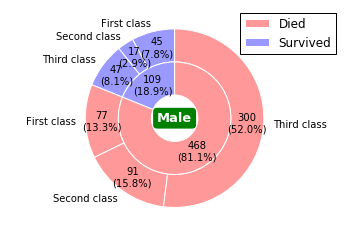

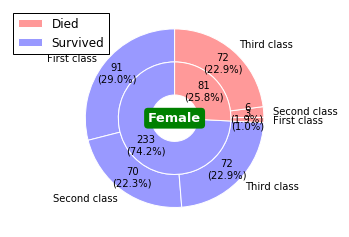

In [141]:
###
### Plot pie charts for male and female passengers
###

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def pie_Pclass(ax, values, **kwargs):
    labels_Pclass = ['First class','Second class','Third class','First class','Second class','Third class']
    total = sum(values)
    def formatter(pct):
        return '{:0.0f}\n({:0.1f}%)'.format(pct*total/100, pct)
    wedges, _, labels = ax.pie(values, labels=labels_Pclass, autopct=formatter, **kwargs)
    return wedges

def pie_Sex(ax, values, **kwargs):
    total = sum(values)
    def formatter(pct):
        return '{:0.0f}\n({:0.1f}%)'.format(pct*total/100, pct)
    wedges, _, labels = ax.pie(values, autopct=formatter, **kwargs)
    return wedges

#Get values needed to plot the pie chart
outer_df = pd.crosstab(index=[titanic_data_df['Sex'], titanic_data_df['Pclass']], columns=titanic_data_df['Survived'])
outer_df.columns = ['Died', 'Survived']
outer_male = pd.concat([outer_df['Survived']['male'], outer_df['Died']['male']])
outer_female = pd.concat([outer_df['Survived']['female'], outer_df['Died']['female']])

inner_df = pd.crosstab(index=titanic_data_df['Sex'], columns=titanic_data_df['Survived'])
inner_df.columns = ['Died', 'Survived']
inner_male = inner_df.loc['male'].iloc[::-1]
inner_female = inner_df.loc['female'].iloc[::-1]

#
#Plot the pie chart
#

print 'Figure 1: Pie charts showing number of passengers survied and died'
width = 0.37 
kwargs_outer = dict(colors=['#9999FF', '#9999FF', '#9999FF', '#FF9999', '#FF9999', '#FF9999'], startangle=90)
kwargs_inner = dict(colors=['#9999FF', '#FF9999'], startangle=90)

#Plot the pie chart for male
fig, ax = plt.subplots()
ax.axis('equal')

outside = pie_Pclass(ax, outer_male, radius=1, pctdistance=1-width/2, **kwargs_outer)
inside = pie_Sex(ax, inner_male, radius=1-width, pctdistance=1 - (width/2) / (1-width), **kwargs_inner)
plt.setp(inside + outside, width=width, edgecolor='white')

ax.legend(inside[::-1], ['Died', 'Survived'], frameon=True)
kwargs = dict(size=13, color='white', va='center', fontweight='bold')

ax.text(0, 0, 'Male', ha='center', 
        bbox=dict(boxstyle='round', facecolor='green', edgecolor='none'),
        **kwargs)
plt.show()

#Plot the pie chart for female
fig, ax = plt.subplots()
ax.axis('equal')

outside = pie_Pclass(ax, outer_female, radius=1, pctdistance=1-width/2, **kwargs_outer)
inside = pie_Sex(ax, inner_female, radius=1-width, pctdistance=1 - (width/2) / (1-width), **kwargs_inner)
plt.setp(inside + outside, width=width, edgecolor='white')

ax.legend(inside[::-1], ['Died', 'Survived'], loc=2, frameon=True)
kwargs = dict(size=13, color='white', va='center', fontweight='bold')

ax.text(0, 0, 'Female', ha='center', 
        bbox=dict(boxstyle='round', facecolor='green', edgecolor='none'),
        **kwargs)
plt.show()

* The two pie charts separately plotted for male and female clearly show strikingly high survival rates for female passengers as distinguished by the blue color.
* The pie charts also show the number of passengers survived and died for different passenger classes.
* The code used to generate Figure 1 were modified from the original code given in http://matplotlib.1069221.n5.nabble.com/how-to-draw-concentric-donuts-chart-td43408.html.

In [142]:
###
### Generate summary table showing survival rates for passenger class
### based on gender, presence of sibling/spouse, and presence of parent/child.
###

def create_tbl_Pclass(var1, var2):
    table_df = pd.crosstab(index=[titanic_data_df[var1], titanic_data_df[var2]], columns=titanic_data_df['Survived'])
    table_df.columns = ['Died', 'Survived']
    tot_by_row = table_df['Died'] + table_df['Survived']
    return table_df.div(tot_by_row, axis='index')

print 'Table 2: Effect of passenger class on survival based on gender informaton'
create_tbl_Pclass('Sex', 'Pclass')

Table 2: Effect of passenger class on survival based on gender informaton


Died  Survived
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

* Above table clearly depicts how survial rates change among different passenger classes.
* Within each gender, survival rates drop as the passenger class changes from first to third class. 

In [143]:
print 'Table 3: Effect of passenger class on survival based on presence of sibling or spouse onboard'
create_tbl_Pclass('Has_SibSp', 'Pclass')

Table 3: Effect of passenger class on survival based on presence of sibling or spouse onboard


Died  Survived
Has_SibSp Pclass                    
False     1       0.437956  0.562044
          2       0.583333  0.416667
          3       0.763533  0.236467
True      1       0.253165  0.746835
          2       0.421875  0.578125
          3       0.742857  0.257143

* Above table also clearly shows drop in survival rates as the passenger class changes from first to third class regardless of having sibling or spouse onboard.

In [144]:
print 'Table 4: Effect of passenger class on survival based on presence of parent or child onboard'
create_tbl_Pclass('Has_Parch', 'Pclass')

Table 4: Effect of passenger class on survival based on presence of parent or child onboard


Died  Survived
Has_Parch Pclass                    
False     1       0.392638  0.607362
          2       0.641791  0.358209
          3       0.774278  0.225722
True      1       0.301887  0.698113
          2       0.220000  0.780000
          3       0.700000  0.300000

* Above table also shows that survival rates decreased as passenger class changed from first to third. 

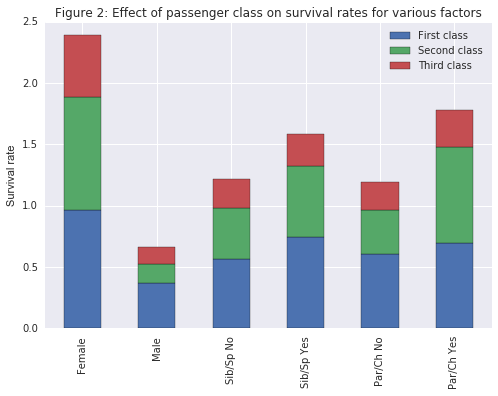

In [145]:
###
### Generate bar charts summarizing passenger class effects on survival
###

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_bar_data(var1, var2):
    tot = titanic_data_df.groupby([var1, var2]).count()['Survived']
    df = titanic_data_df.groupby([var1, var2]).sum()['Survived']
    survivor_df = df / tot
    for_bar = np.array([survivor_df[:3], survivor_df[3:]])
    return survivor_df, pd.DataFrame(for_bar)
    
bar_Sex1, bar_Sex = generate_bar_data('Sex', 'Pclass')
bar_Has_SibSp1, bar_Has_SipSp = generate_bar_data('Has_SibSp', 'Pclass')
bar_Has_Parch1, bar_Has_Parch = generate_bar_data('Has_Parch', 'Pclass')

bar_df = pd.concat([bar_Sex, bar_Has_SipSp, bar_Has_Parch])
bar_df.columns = ['First class', 'Second class', 'Third class']
bar_df.index = ['Female','Male', 'Sib/Sp No','Sib/Sp Yes', 'Par/Ch No','Par/Ch Yes']

bar_df.plot.bar(stacked=True, title='Figure 2: Effect of passenger class on survival rates for various factors')
plt.ylabel('Survival rate')

* The bar chart above provides summary of various factor effects on the passenger survival rates.
* Comparing the total heights of survival rates for female and men, it is clear that female passengers were more likely to have survived the accident.
* The second and third pair of bars show that passengers with sibling/spouse or parent/child onboard the ship were slightly more likely to have survived the accident.
* The chart also clearly shows that first or second class passengers were much more likely to have survived the accident compared with third class passengers, since the red bars (third class passengers) are shorter than blue (first class passengers) or green (second class passengers) bars.

Table 5: Passenger age statistics for all onboard
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64




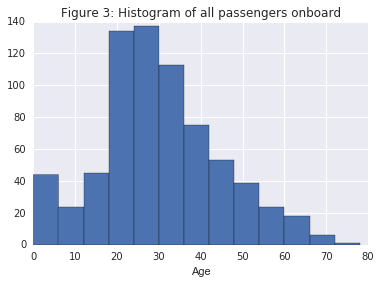

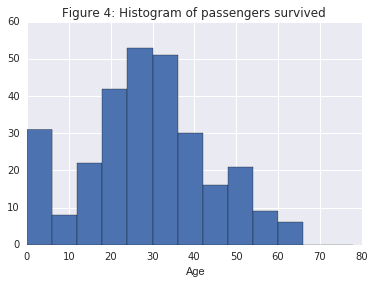

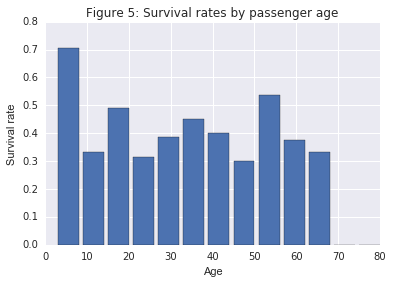

In [146]:
###
### Anaysis of influence of age on the survival.
###

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print 'Table 5: Passenger age statistics for all onboard'
passenger_age = titanic_data_df['Age'].dropna()   #Note that some passengers did not have age data, and those were dropped.
print passenger_age.describe()   
print '\n'

# Plot histogram of passenger age distribution
plt.figure(1)
passenger_freq = plt.hist(passenger_age, bins=range(0,80,6))
plt.xlabel('Age')
plt.title('Figure 3: Histogram of all passengers onboard')

# Plot histogram of surved passenger age distribution
survived_index = titanic_data_df[titanic_data_df['Survived'] == 1].index.tolist()  #See the reference given in the main text
surviver_age = titanic_data_df['Age'].iloc[survived_index]                         #explaining Figure 2 for the code.
survived_passenger_age = surviver_age.dropna()

plt.figure(2)
survival_freq = plt.hist(survived_passenger_age, bins=range(0,80,6))
plt.xlabel('Age')
plt.title('Figure 4: Histogram of passengers survived')

# Plot survival rate by age group
plt.figure(3)
data = pd.Series(survival_freq[0] / passenger_freq[0])
age_bin = pd.Series(survival_freq[1])
age_avg = (age_bin + age_bin.shift()).dropna() / 2

plt.bar(age_avg, data, width=5)
plt.title('Figure 5: Survival rates by passenger age')
plt.xlabel('Age')
plt.ylabel('Survival rate')

* Table 5 shows the statistics of passenger age with mean of 29.7 years and standard deviation of 14.5 years. The histogram of all passenger ages are shown in Figure 3. Figure 4 shows the histogram of passenger ages for those who survived. The code used to generate data needed to produce Figure 4 are from http://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value. (It was real challenge to find a way to get the index based on element values!)
* Figure 5 shows distribution of passenger ages for those who survived. It is apparent that children under age 6 had higher survival rate than any other age group.

## 3. Conclusions
* Women were more likely to have survived the accident than men as their overall survival rates were 74.2% in comparison to 18.9% for men. This was also true within each passenger class. Women's survival rates were strikingly high for first and second class passengers at 96.8% and 92.1%, respectively.
* Higher class passengers were more likely to have survived the accident than lower class passengers. The survival rates for the first and second class passengers were 63.0% and 47.3%, respectively, while third class passenger survival rate was only 24.2% in comparison to overall survival rate of 38.4%.
* Young children under the age of 6 were more likely to have survived the accident than any other age group. In addition, passengers older than 70 were likely to have died from the accident. Age data are missing for 19.9% of passengers, and therefore, increases uncertainty of the conclusions made with regards to the passenger age.
* It is hard to definitely answer second question whether lower class passengers were unfairly treated and forced to sacrifice. However, the data clearly shows that third class passengers were much more likely to have died from the accident. It was also noted in data wrangling section that percent of missing age data are markedly high in third class passengers, which leads to speculation whether less efforts were made to retrieve information of third class passengers.
## 4. Thoughts on how to build on this report 
* The analysis in some way reflects the society at that era how women, young children, and wealth were valued and affected behavior of people in tragic accidents or life-threatening circumstances. It may be interesting to compare tragic accidents in other periods to understand how the social values evolved or changed.
* If a map of the cabins in the ship were given, it will be interesting to see how cabin location affected the surviver rates of those passengers.